In [1]:
from pnp_pipeline import SDXLDDIMPipeline
import torch

pipe = SDXLDDIMPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

/root/miniconda3/envs/storydiffusion/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/root/miniconda3/envs/storydiffusion/lib/python3.10/site-packages/diffusers/models/transformers/transformer_2d.py:34: FutureWarning: `Transformer2DModelOutput` is deprecated and will be removed in version 1.0.0. Importing `Transformer2DModelOutput` from `diffusers.models.transformer_2d` is deprecated and this will be removed in a future version. Please use `from diffusers.models.modeling_outputs import Transformer2DModelOutput`, instead.
  deprecate("Transformer2DModelOutput", "1.0.0", deprecation_message)
Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  5.09it/s]


In [2]:
import PIL

init = PIL.Image.open("example.png")

x = pipe(prompt = "green horse", image = init)

100%|██████████| 50/50 [00:06<00:00,  7.75it/s]


In [3]:
from diffusers import StableDiffusionXLPipeline, DDIMScheduler
pipe = StableDiffusionXLPipeline.from_pretrained(
    "stabilityai/stable-diffusion-xl-base-1.0",
    torch_dtype=torch.float16,
    use_safetensors=True,
    variant="fp16",
).to("cuda")

pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)



Loading pipeline components...: 100%|██████████| 7/7 [00:01<00:00,  6.50it/s]


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:11<00:00,  4.30it/s]


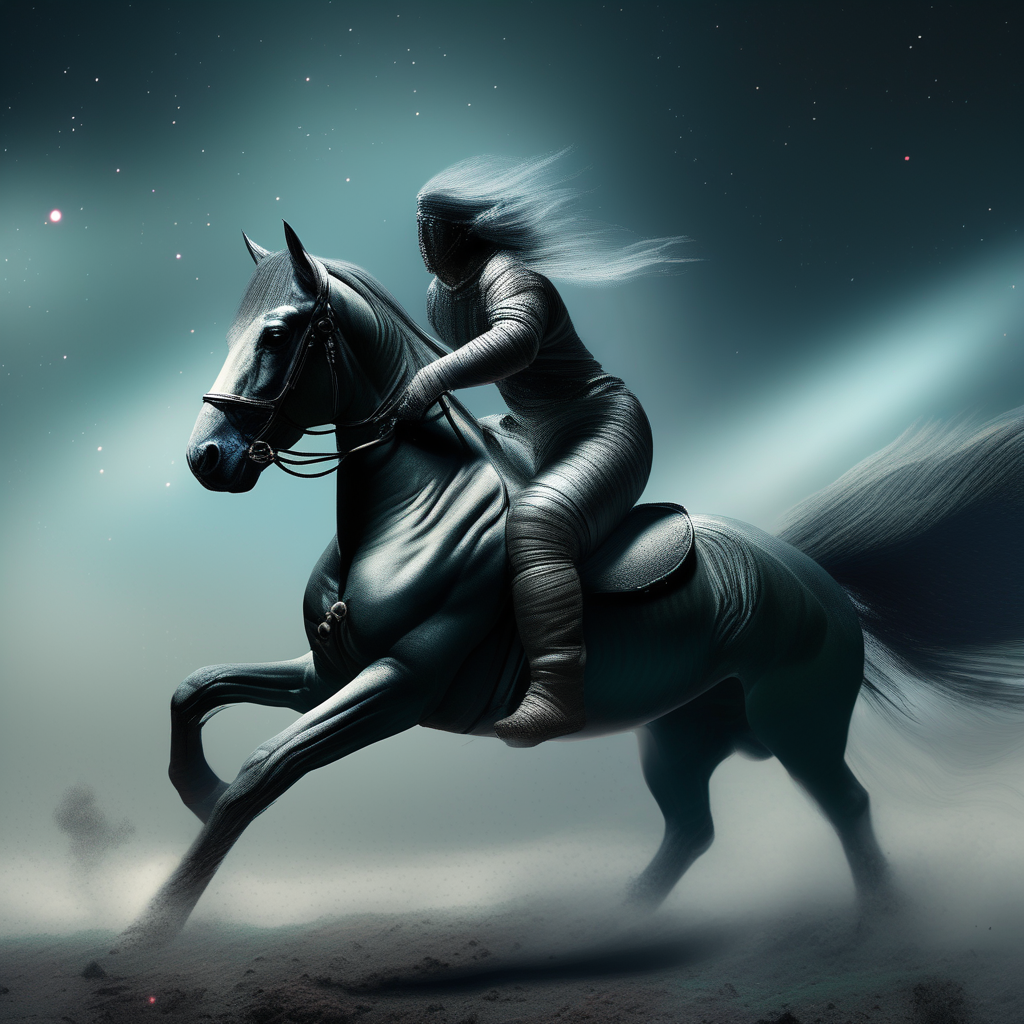

In [ ]:
img = pipe(prompt = "fantasy black horse, masterpiece, 4 K", latents = x[0].clone(), guidance_scale = 3.5 ).images[0]
img

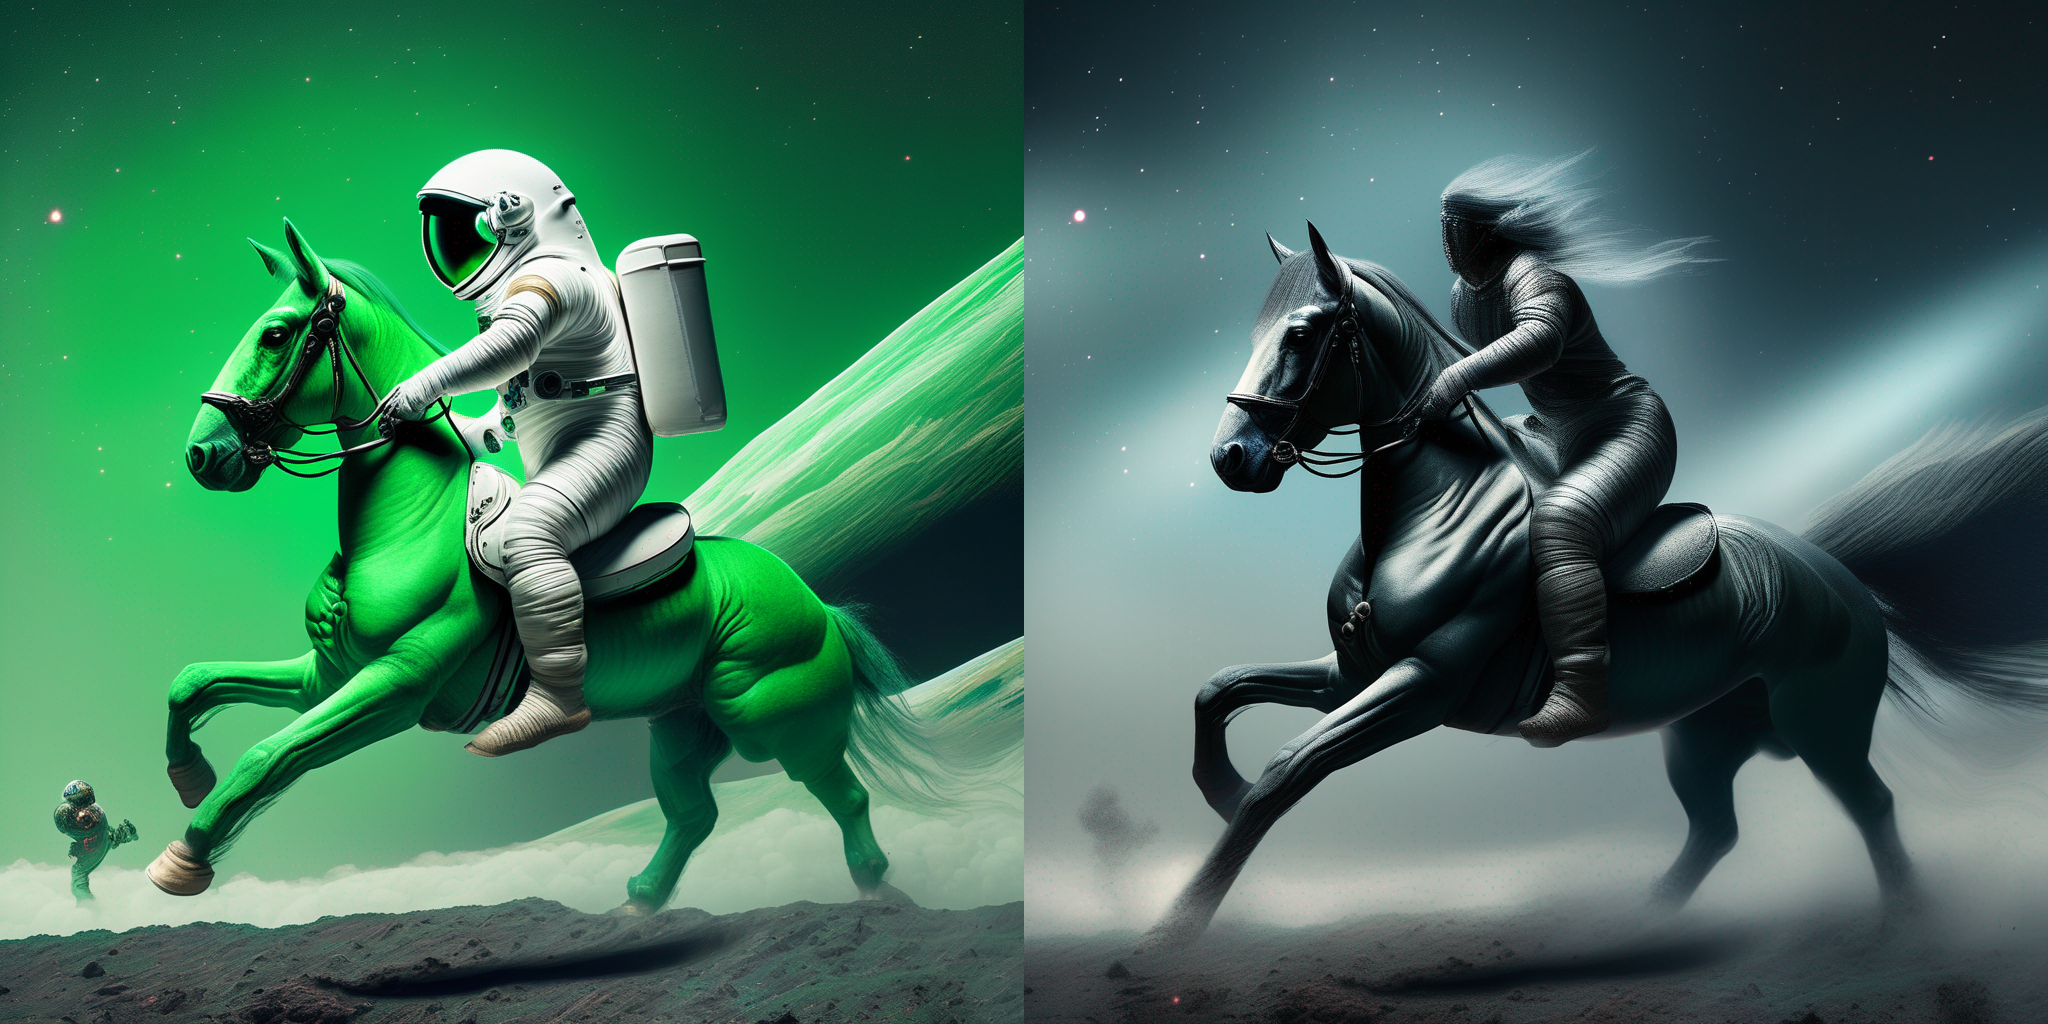

In [13]:
import PIL
from PIL import Image
import numpy as np

def image_grid(images, rows=None, columns=None):
    num_images = len(images)
    
    if rows is None and columns is None:
        rows = 1
        columns = num_images
    elif rows is None:
        rows = int(np.ceil(num_images / columns))
    elif columns is None:
        columns = int(np.ceil(num_images / rows))
    
    grid_width = columns * images[0].width
    grid_height = rows * images[0].height
    grid_image = Image.new('RGB', (grid_width, grid_height))
    
    for i, image in enumerate(images):
        row = i // columns
        col = i % columns
        x_offset = col * image.width
        y_offset = row * image.height
        grid_image.paste(image, (x_offset, y_offset))
    
    return grid_image

image_grid([PIL.Image.open("example.png"), img])
    